# <center>Machine Learning Report</center>
### <center>Donato Meoli</center>

<center>Machine Learning course 654AA</center>
<center>Academic year: 2019/2020</center>

<center>Type of project: A with Computational Mathematics</center>

## Abstract

I developed a sklearn compatible module with a custom reimplementation of some of the most importat machine learning models inluding *Linear* and *Logistic Regression*, *Deep Neural Networks* and *Support Vector Machines*, many of which come with some of the most successeful features according to the state of art of recent years.

This work was motivated by the possibility of being able to solve the optimization problem deriving from the mathematical formalization of these models through a wide range of optimization algorithms object of study and developed for the Computational Mathematics course.

The scope of this report excludes the implementation details but is just to show the results over the *Monk's* classification problem and the *Grid Search* results over **ML-CUP19** regression problem. The latter refers to an academic competition within the Machine Learning course for which a **MAE** of **0.7** was archivied through a **Support Vector Regression** with **Laplacian kernel**.

The choice of the model was dictated by my personal fascination about the possibility of formalizing a *Box-Constrained Quadratic* optimization problem, which represents the core of a *Support Vector Machine*, as a *Quadratic* (unconstrained) optimization problem through its *Dual* formulation as a *Lagrangian* relaxation which allows to solve the problem with any other optimization algorithm.

For efficiency reasons, the Grid Search over ML-CUP19 was done with a custom reimplementation of the Platt's *Sequential Minimization Optimization* algorithm as core solver which is known to be the most efficient way to train a SVM since it breaks up large BCQP problems into a series of smallest possible BCQP problems, which are then solved analytically.

## Monk's Problem

### Support Vector Classifier

In [2]:
from utils import load_monk
from ml.svm import SVC
from sklearn.metrics import classification_report

#### Monk #1

In [8]:
X_train, X_test, y_train, y_test = load_monk(1)

svc = SVC(kernel='poly', degree=3, gamma='scale', verbose=5)
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

iter	f(x)
   0	-1.3103e+01
   5	-1.5372e+01
  10	-1.5373e+01
  15	-1.5650e+01
  20	-1.5653e+01
  25	-1.5653e+01
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       216
         1.0       1.00      1.00      1.00       216

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



#### Monk #2

In [4]:
X_train, X_test, y_train, y_test = load_monk(2)

svc = SVC(kernel='poly', C=1000, degree=2, gamma='scale', verbose=5)
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

iter	f(x)
   0	-1.2859e+02
   5	-3.4749e+02
  10	-3.6481e+02
  15	-3.6638e+02
  20	-3.6654e+02
  25	-3.6655e+02
  30	-3.6655e+02
  35	-3.6655e+02
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       290
         1.0       1.00      1.00      1.00       142

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



#### Monk #3

In [5]:
X_train, X_test, y_train, y_test = load_monk(3)

svc = SVC(kernel='poly', C=100, degree=4, gamma='auto', verbose=5)
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

iter	f(x)
   0	-2.4690e+03
   5	-2.5680e+03
  10	-2.6527e+03
  15	-2.6544e+03
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       204
         1.0       0.99      0.95      0.97       228

    accuracy                           0.97       432
   macro avg       0.97      0.97      0.97       432
weighted avg       0.97      0.97      0.97       432



### Neural Network

In [21]:
from ml.neural_network.activations import sigmoid, softmax
from ml.neural_network.layers import FullyConnected
from ml.neural_network.losses import mean_squared_error, categorical_cross_entropy, sparse_categorical_cross_entropy
from ml.neural_network.neural_network import NeuralNetworkClassifier
from ml.neural_network.regularizers import L2
from optimization.unconstrained.stochastic.adam import Adam
from utils import load_monk
from utils import plot_model_accuracy, plot_model_loss
from sklearn.metrics import classification_report

#### Monk #1

iter	f(x)		||g(x)||
   0	1.3891e-01	6.5333e+00
  10	7.7172e-02	1.7938e+00
  20	5.7398e-02	1.1418e+00
  30	5.0830e-02	5.5430e-01
  40	4.6254e-02	2.3933e-01
  50	4.2920e-02	2.2855e-01
  60	3.6632e-02	3.2039e-01
  70	3.3338e-02	2.1756e-01
  80	3.1849e-02	1.1412e-01
  90	3.1218e-02	9.2829e-02
 100	3.0747e-02	8.9269e-02
 110	2.8941e-02	1.9463e-01
 120	2.4075e-02	3.4886e-01
 130	1.1625e-02	4.3716e-01
 140	7.7770e-03	1.7359e-01
 150	6.6346e-03	1.1663e-01
 160	6.0813e-03	8.5023e-02
 170	5.7324e-03	6.1011e-02
 180	1.3540e-03	2.4769e-01
 190	7.9973e-04	4.9543e-02
 200	6.9398e-04	3.6101e-02


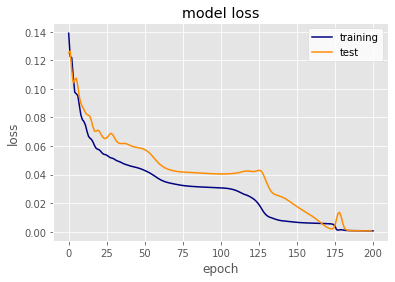

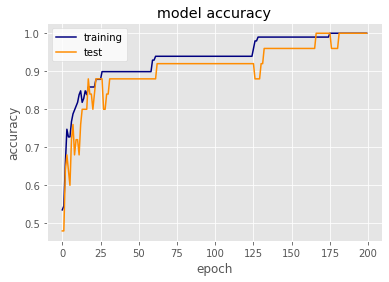

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       216
         1.0       1.00      1.00      1.00       216

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



In [7]:
X_train, X_test, y_train, y_test = load_monk(1)
net = NeuralNetworkClassifier((FullyConnected(17, 4, sigmoid),
                               FullyConnected(4, 1, sigmoid)),
                              loss=mean_squared_error, optimizer=Adam, 
                              learning_rate=0.2, epochs=200,
                              validation_split=0.2, verbose=10)
net.fit(X_train, y_train)
plot_model_loss(net.loss_history)
plot_model_accuracy(net.accuracy_history)
print(classification_report(y_test, net.predict(X_test)))

#### Monk #2

iter	f(x)		||g(x)||
   0	7.5517e-01	1.8093e+02
  10	3.3754e-01	2.6957e+01
  20	3.2899e-01	1.7600e+01
  30	3.1266e-01	6.3420e+00
  40	2.8102e-01	8.1870e+00
  50	2.2890e-01	7.6166e+00
  60	2.1130e-01	3.7949e+00
  70	2.0554e-01	1.5943e+00
  80	2.0375e-01	7.2082e-01
  90	2.0308e-01	6.2984e-01
 100	2.0270e-01	5.5392e-01
 110	2.0242e-01	4.6100e-01
 120	2.0208e-01	4.8587e-01
 130	2.0078e-01	1.2394e+00
 140	1.7066e-01	1.3692e+01
 150	6.4154e-02	8.2871e+00
 160	2.0277e-02	2.5641e+00
 170	1.2028e-02	1.9264e+00
 180	8.3492e-03	1.2095e+00
 190	6.5148e-03	9.4201e-01
 200	5.4192e-03	7.7545e-01


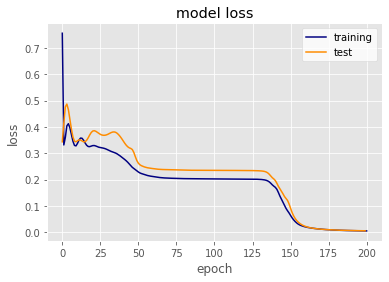

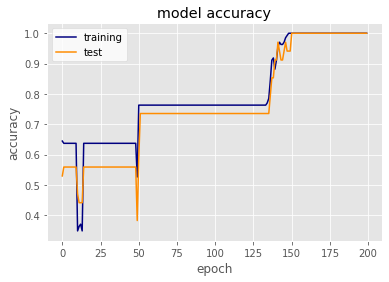

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       290
         1.0       1.00      1.00      1.00       142

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



In [19]:
X_train, X_test, y_train, y_test = load_monk(2)
net = NeuralNetworkClassifier((FullyConnected(17, 5, sigmoid),
                               FullyConnected(5, 2, softmax)),
                              loss=categorical_cross_entropy, optimizer=Adam, 
                              learning_rate=0.2, epochs=200,
                              validation_split=0.2, verbose=10)
net.fit(X_train, y_train)
plot_model_loss(net.loss_history)
plot_model_accuracy(net.accuracy_history)
print(classification_report(y_test, net.predict(X_test)))

#### Monk #3

In [23]:
X_train, X_test, y_train, y_test = load_monk(3)
net = NeuralNetworkClassifier((FullyConnected(17, 4, sigmoid, w_reg=L2(lmbda=1e-5), b_reg=L2(lmbda=1e-5)),
                               FullyConnected(4, 2, softmax, w_reg=L2(lmbda=1e-5), b_reg=L2(lmbda=1e-5))),
                              loss=sparse_categorical_cross_entropy, optimizer=Adam, learning_rate=0.2, epochs=200,
                              validation_split=0.2, verbose=10)
net.fit(X_train, y_train)
plot_model_loss(net.loss_history)
plot_model_accuracy(net.accuracy_history)
print(classification_report(y_test, net.predict(X_test)))

iter	f(x)		||g(x)||

AssertionError: 